In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
df = pd.read_csv('tele12.csv')  

In [3]:
df.rename(columns={'Time Of Day':'time_of_day_long','Vehicle Speed': 'vehicle_speed', 'Engine Speed':'engine_speed','Throttle':'throttle','Lap Distance':'lap_distance'}, inplace=True)

In [4]:
df.columns

Index(['command', 'No', 'time_of_day_long', 'lap_distance', 'vehicle_speed',
       'engine_speed', 'Gear', 'Brake', 'throttle'],
      dtype='object')

In [5]:
df.head(10)

,command,No,time_of_day_long,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle
0,$P,12,58680.453,0.17,57.36,3888,3,0,0.0
1,$P,12,58680.546,2.76,56.75,3943,3,0,2.5
2,$P,12,58680.630,5.35,57.53,3689,3,0,0.0
3,$P,12,58680.723,7.93,57.04,3976,3,0,0.0
4,$P,12,58680.816,10.44,58.16,3818,3,0,0.5
5,$P,12,58680.909,13.02,57.54,4186,3,0,1.5
6,$P,12,58681.071,15.70,58.47,3697,3,0,2.5
7,$P,12,58681.164,18.28,58.33,3914,3,0,2.0
8,$P,12,58681.252,20.87,58.26,4116,3,0,2.0
9,$P,12,58681.425,23.55,59.63,4241,3,0,2.0


In [6]:
df.Gear.unique()

array([3, 4, 5, 6, 2, 1, 0])

In [7]:
df.describe()

,No,time_of_day_long,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle
count,78883.0,78883.000000,78883.000000,78883.000000,78883.000000,78883.000000,78883.000000,78883.000000
mean,12.0,64480.748343,2051.093987,163.833161,8868.677827,4.979641,0.917942,59.195486
std,0.0,3262.566904,1240.536909,64.048194,3121.299107,1.286614,6.023655,50.056167
min,12.0,58680.453000,0.130000,0.190000,2401.000000,0.000000,0.000000,0.000000
25%,12.0,61674.687500,944.755000,95.340000,5284.000000,5.000000,0.000000,1.500000
50%,12.0,64606.147000,1945.190000,209.080000,11104.000000,5.000000,0.000000,66.000000
75%,12.0,67351.795000,3216.270000,220.315000,11527.000000,6.000000,0.000000,109.000000
max,12.0,69881.882000,4185.220000,237.700000,12500.000000,6.000000,100.000000,111.000000


In [8]:
df.rename(columns={'Time Of Day':'time_of_day_long','Vehicle Speed': 'vehicle_speed', 'Engine Speed':'engine_speed','Throttle':'throttle','Lap Distance':'lap_distance'}, inplace=True)

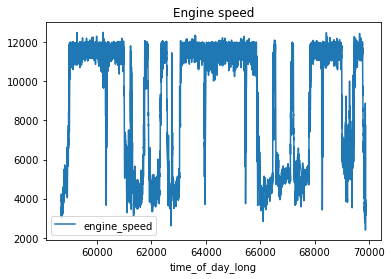

In [9]:
df.plot(x='time_of_day_long', y='engine_speed')
plt.title("Engine speed")
plt.show()

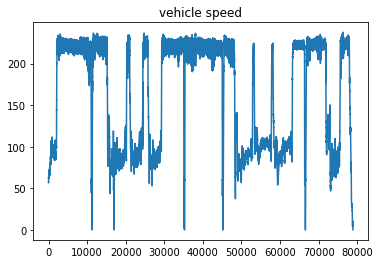

In [10]:
vehicle_speed = df['vehicle_speed'].values
plt.plot(vehicle_speed)
plt.title('vehicle speed')
plt.show()

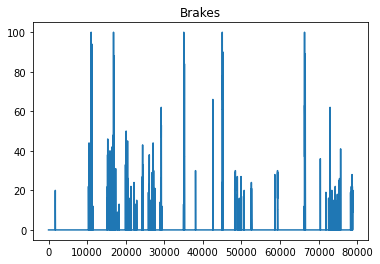

In [11]:
B = df['Brake'].values
plt.plot(B)
plt.title('Brakes')
plt.show()

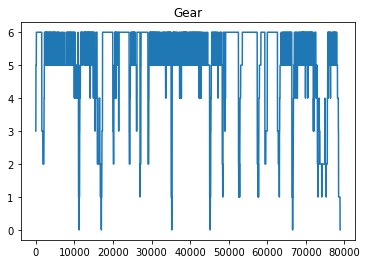

In [12]:
G = df['Gear'].values
plt.plot(G)
plt.title('Gear')
plt.show()

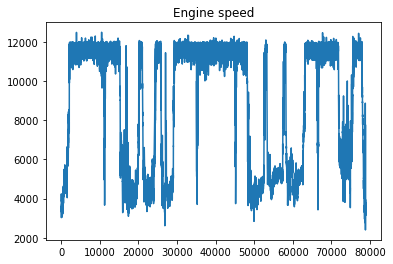

In [13]:
engine_speed = df['engine_speed'].values
plt.plot(engine_speed)
plt.title('Engine speed')
plt.show()

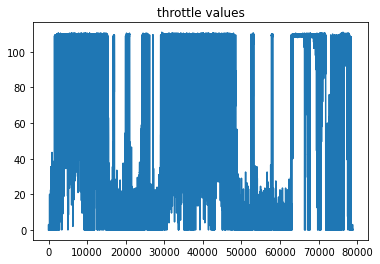

In [14]:
throttle = df['throttle'].values
plt.plot(throttle)
plt.title('throttle values')
plt.show()

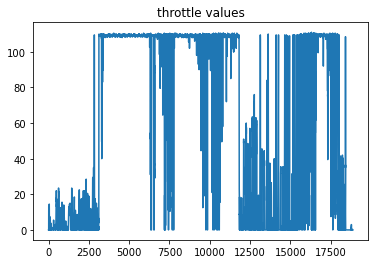

In [15]:
plt.plot(throttle[60000:80000])
plt.title('throttle values')
plt.show()

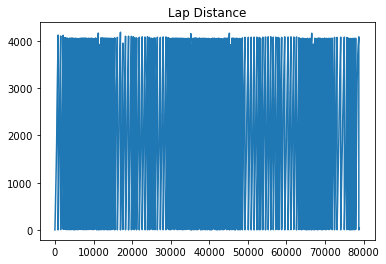

In [16]:
lap_distance = df['lap_distance'].values
plt.plot(lap_distance)
plt.title('Lap Distance')
plt.show()

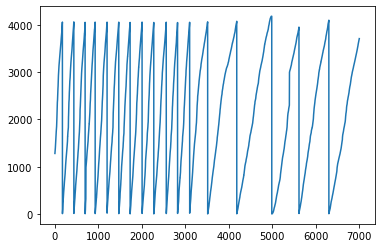

In [17]:
plt.plot(lap_distance[12000:19000])
plt.show()

In [18]:
df['vehicle_speed'].corr(df['throttle'])

0.8091731489279519

In [19]:
df['lap_distance'].corr(df['engine_speed'])

-0.009297179955362457

In [20]:
df['engine_speed'].corr(df['vehicle_speed'])

0.9560426533470695

In [21]:
df['lap_distance'].corr(df['throttle'])

0.058909539502658474

In [22]:
df['time_diff'] = df['time_of_day_long'].diff(1)
df['time_diff']

0          NaN
1        0.093
2        0.084
3        0.093
4        0.093
         ...  
78878    0.093
78879    0.075
78880    0.130
78881    0.093
78882    0.094
Name: time_diff, Length: 78883, dtype: float64

In [23]:
dt=df['time_diff']
dt.describe()

count    78882.000000
mean         0.142002
std          0.219962
min          0.029000
25%          0.093000
50%          0.093000
75%          0.177000
max         47.371000
Name: time_diff, dtype: float64

In [24]:
df[df['time_diff'] >40]

,command,No,time_of_day_long,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle,time_diff
12712,$P,12,60612.154,918.0,217.19,11402,5,0,109.0,47.371


In [25]:
df=df.drop(['command','No','time_diff'], axis = 1)

In [26]:
df = df.set_index('time_of_day_long') 

In [27]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle
time_of_day_long,,,,,,
58680.453,0.17,57.36,3888,3,0,0.0
58680.546,2.76,56.75,3943,3,0,2.5
58680.630,5.35,57.53,3689,3,0,0.0
58680.723,7.93,57.04,3976,3,0,0.0
58680.816,10.44,58.16,3818,3,0,0.5


In [28]:
df_gear = pd.get_dummies(df.Gear, prefix='Gear')

In [29]:
df_gear.head(5)

,Gear_0,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6
time_of_day_long,,,,,,,
58680.453,0,0,0,1,0,0,0
58680.546,0,0,0,1,0,0,0
58680.630,0,0,0,1,0,0,0
58680.723,0,0,0,1,0,0,0
58680.816,0,0,0,1,0,0,0


In [30]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed,Gear,Brake,throttle
time_of_day_long,,,,,,
58680.453,0.17,57.36,3888,3,0,0.0
58680.546,2.76,56.75,3943,3,0,2.5
58680.630,5.35,57.53,3689,3,0,0.0
58680.723,7.93,57.04,3976,3,0,0.0
58680.816,10.44,58.16,3818,3,0,0.5


In [31]:
df = df.drop('Gear',axis = 1)

In [32]:
df=df.join(df_gear)

In [33]:
df.head(5)

,lap_distance,vehicle_speed,engine_speed,Brake,throttle,Gear_0,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6
time_of_day_long,,,,,,,,,,,,
58680.453,0.17,57.36,3888,0,0.0,0,0,0,1,0,0,0
58680.546,2.76,56.75,3943,0,2.5,0,0,0,1,0,0,0
58680.630,5.35,57.53,3689,0,0.0,0,0,0,1,0,0,0
58680.723,7.93,57.04,3976,0,0.0,0,0,0,1,0,0,0
58680.816,10.44,58.16,3818,0,0.5,0,0,0,1,0,0,0


In [34]:
train_size = int(len(df) * 0.95)
test_size = len(df) - train_size
X_train,X_test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(X_train.shape,X_test.shape)

(74938, 12) (3945, 12)


In [35]:
X_train_df=X_train
X_test_df=X_test

In [36]:
print(X_train.shape)
print(X_test.shape)

(74938, 12)
(3945, 12)


In [37]:
X_train.shape

(74938, 12)

In [38]:
X_test.shape

(3945, 12)

In [39]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [40]:
X_train=X_train.apply(lambda x: x / np.max(x), axis=0)
X_test=X_test.apply(lambda x: x / np.max(x), axis=0)

In [41]:
X_train.head(5)

,lap_distance,vehicle_speed,engine_speed,Brake,throttle,Gear_0,Gear_1,Gear_2,Gear_3,Gear_4,Gear_5,Gear_6
time_of_day_long,,,,,,,,,,,,
58680.453,0.000041,0.242240,0.31104,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58680.546,0.000659,0.239664,0.31544,0.0,0.022523,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58680.630,0.001278,0.242958,0.29512,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58680.723,0.001895,0.240889,0.31808,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58680.816,0.002494,0.245618,0.30544,0.0,0.004505,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
TIME_STEPS = 30

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(X_train,X_train, TIME_STEPS)
X_test, y_test = create_dataset(X_test,X_test, TIME_STEPS)

print(X_train.shape)

(74908, 30, 12)


In [43]:
print(X_train.shape)
print(X_test.shape)

(74908, 30, 12)
(3915, 30, 12)


In [44]:
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [45]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=128,input_shape=(30,12)))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=30))
model.add(keras.layers.LSTM(units=128, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=12)))
model.compile(loss='mae', optimizer='adam')

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               72192     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed (TimeDistri (None, 30, 12)            1548      
Total params: 205,324
Trainable params: 205,324
Non-trainable params: 0
__________________________________________________

In [47]:
history = model.fit(X_train,X_train, epochs=1000, batch_size=512, validation_split=0.1,callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/1000
132/132 [==============================] - 23s 172ms/step - loss: 0.1273 - val_loss: 0.0895
Epoch 2/1000
132/132 [==============================] - 22s 166ms/step - loss: 0.0930 - val_loss: 0.0668
Epoch 3/1000
132/132 [==============================] - 22s 165ms/step - loss: 0.0820 - val_loss: 0.0700
Epoch 4/1000
132/132 [==============================] - 22s 165ms/step - loss: 0.0694 - val_loss: 0.0624
Epoch 5/1000
132/132 [==============================] - 22s 166ms/step - loss: 0.0701 - val_loss: 0.0630
Epoch 6/1000
132/132 [==============================] - 22s 166ms/step - loss: 0.0626 - val_loss: 0.0481
Epoch 7/1000
132/132 [==============================] - 22s 165ms/step - loss: 0.0587 - val_loss: 0.0488
Epoch 8/1000
132/132 [==============================] - 22s 164ms/step - loss: 0.0570 - val_loss: 0.0478
Epoch 9/1000
132/132 [==============================] - 22s 165ms/step - loss: 0.0541 - val_loss: 0.0454
Epoch 10/1000
132/132 [==============================] 

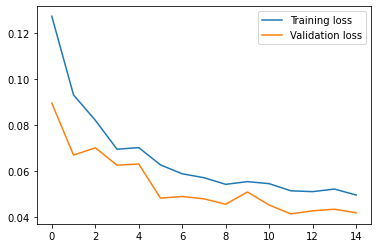

In [48]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend();

In [49]:
model.evaluate(X_test,X_test)

123/123 [==============================] - 2s 14ms/step - loss: 0.0509


0.05089417099952698

In [ ]:
X_train_pred = model.predict(X_train, verbose=0)
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis=1)

In [ ]:
train_mae_loss.shape

In [ ]:
plt.hist(train_mae_loss, bins=50)
plt.xlabel('Train MAE loss')
plt.ylabel('Number of Samples');
threshold = np.max(train_mae_loss)
print(f'Reconstruction error threshold: {threshold}')

In [ ]:
X_test_pred = model.predict(X_test, verbose=0)
test_mae_loss = np.mean(np.abs(X_test_pred-X_test), axis=1)

plt.hist(test_mae_loss, bins=50)
plt.xlabel('Test MAE loss')
plt.ylabel('Number of samples');

In [ ]:
y_pred = model.predict(X_test)
print('Predict shape:', y_pred.shape); 
mae = np.mean(np.abs(y_pred - X_test), axis=1)
pred = y_pred.reshape((y_pred.shape[0] * y_pred.shape[1]), y_pred.shape[2])
print('Prediction:', pred.shape);
print('Test data shape:', X_test.shape); 
X_test = X_test.reshape((X_test.shape[0] * X_test.shape[1]), X_test.shape[2])
print('Test data:', X_test.shape);
errors = X_test - pred
print('Error:', errors.shape); 
RMSE = math.sqrt(mean_squared_error(X_test,pred))
print('Test RMSE: %.3f' % RMSE);

In [ ]:
dist = np.linalg.norm(X_test-pred,axis=1)
scores = dist.copy()
print('Score :',scores.shape);
scores.sort();
cut_off = int(0.*len(scores));
print('Cut off value :',cut_off);
threshold=scores[cut_off];
print('Threshold Value :',threshold);

In [ ]:
X_test.shape

In [ ]:
X_test[0]

In [ ]:
pred[0]

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(X_test[:,1],color='green')
plt.plot(pred[:,1],color='red')
plt.show()

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(X_test[:,0],color='green')
plt.plot(pred[:,0],color='red')
plt.show()

In [ ]:
np.corrcoef(X_test[:,0],pred[:,0])

In [ ]:
np.corrcoef(X_test[:,2],pred[:,2])

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(X_test[:,4],color='green')
plt.plot(pred[:,4],color='red')
plt.title('throttle actual vs predicted')
plt.show()

In [ ]:
np.corrcoef(X_test[:,3],pred[:,3])

In [ ]:
np.corrcoef(X_test[:,4],pred[:,4])

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(X_train[:,4],color='green')
plt.plot(X_train_pred[:,4],color='red')
plt.show()

In [ ]:
threshold

In [109]:
THRESHOLD = threshold

In [131]:
test_mae_loss.shape

(3915, 12)

In [132]:
test_mae_loss=test_mae_loss[:, [0,1,2]]

In [133]:
type(test_mae_loss)

numpy.ndarray

In [134]:
test_mae_loss_mean=np.mean(test_mae_loss, axis = 1)

In [135]:
test_mae_loss_mean.shape

(3915,)

In [136]:
test_mae_loss_mean=test_mae_loss_mean.reshape((-1,1))

In [137]:
test_mae_loss_mean.shape

(3915, 1)

In [138]:
X_test_df.shape

(3945, 12)

In [139]:
X_test_df.iloc[30:].shape

(3915, 12)

In [140]:
test_score_df = pd.DataFrame(index=X_test_df.iloc[30:].index)

In [141]:
test_score_df['loss'] = test_mae_loss_mean

In [142]:
test_score_df['threshold'] = THRESHOLD
test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

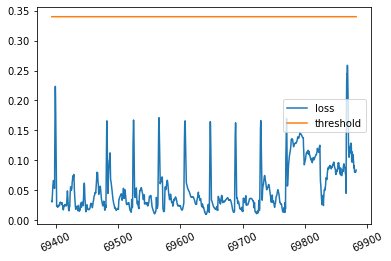

In [143]:
plt.plot(test_score_df.index, test_score_df.loss, label='loss')
plt.plot(test_score_df.index, test_score_df.threshold, label='threshold')
plt.xticks(rotation=25)
plt.legend();

In [144]:
anomalies = test_score_df[test_score_df.anomaly == True]
anomalies.head()

,loss,threshold,anomaly
time_of_day_long,,,
